### Step 1: Import necessary libraries for data handling, visualization, and text processing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('punkt') 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

[nltk_data] Downloading package stopwords to C:\Users\Ibrahim
[nltk_data]     Khalid\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Ibrahim
[nltk_data]     Khalid\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Step 2: Load and clean the training and testing datasets, remove empty or NaN text entries

In [2]:
tweets_df = pd.read_csv("train.csv")
tweets_df = tweets_df[['text', 'sentiment']]

test_df = pd.read_csv("test.csv")
test_df = test_df[['text', 'sentiment']]

# Remove empty or NaN rows from training data
tweets_df.dropna(subset=['text'], inplace=True)
tweets_df = tweets_df[tweets_df['text'].str.strip() != '']


In [23]:
tweets_df.shape

(27480, 2)

### Step 3: Analyze the sentiment distribution and visualize it using a bar plot

C:\Users\Ibrahim Khalid\AppData\Local\Temp\ipykernel_14308\3570526253.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=tweets_df, palette='viridis')


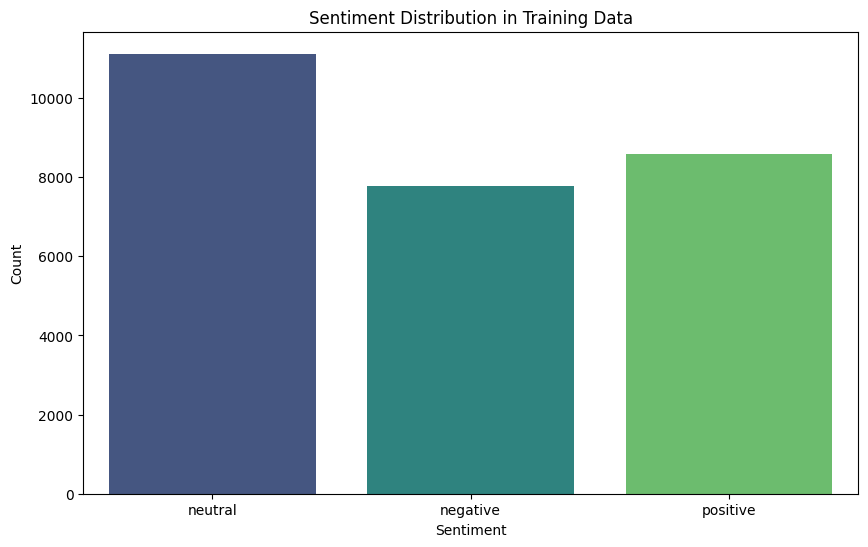

In [3]:
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=tweets_df, palette='viridis')
plt.title('Sentiment Distribution in Training Data')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

### Step 4: Define a function `textClean` to preprocess text by removing punctuation, URLs, and stopwords

In [4]:
def textClean(text):
    nopunc = [char.lower() for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    tokens = word_tokenize(nopunc)
    nohttp = [word for word in tokens if word[0:4] != 'http']
    nostop = [word for word in nohttp if word not in stopwords.words('english')]
    return nostop


### Step 5: Vectorize the cleaned text using `CountVectorizer` to transform it into a numerical format for machine learning

In [5]:
vectorizer = CountVectorizer(analyzer=textClean)

message = vectorizer.fit_transform(tweets_df['text'])

doc = pd.DataFrame(message.toarray(), columns=vectorizer.get_feature_names_out())


In [22]:
# doc.head()
doc.shape

(27480, 27820)

### Step 6: Split the data into training and testing sets

In [6]:
xtrain, xtest, ytrain, ytest = train_test_split(message, tweets_df.sentiment, test_size=0.20, random_state=20)

### Step 7: Train the SVM (support vector machine) model

In [7]:
svc_model = SVC(C=0.2, kernel='linear', gamma=0.8)
svc_model.fit(xtrain, ytrain)

SVC(C=0.2, gamma=0.8, kernel='linear')

### Step 8: Evaluate the SVM model on the training data

In [8]:
train_pred = svc_model.predict(xtrain)
print("Training Data Classification Report:\n", classification_report(ytrain, train_pred))
print("Training Data Accuracy:", accuracy_score(ytrain, train_pred))

Training Data Classification Report:
               precision    recall  f1-score   support

    negative       0.88      0.75      0.81      6253
     neutral       0.76      0.88      0.82      8863
    positive       0.88      0.82      0.85      6868

    accuracy                           0.82     21984
   macro avg       0.84      0.82      0.82     21984
weighted avg       0.83      0.82      0.82     21984

Training Data Accuracy: 0.8245542212518195


### Step 9: Evaluate the SVM model on the test data

AttributeError: 'csr_matrix' object has no attribute 'head'

In [9]:
#test from train.csv
test_pred = svc_model.predict(xtest)
print("Testing Data Classification Report:\n", classification_report(ytest, test_pred))
print("Testing Data Accuracy:", accuracy_score(ytest, test_pred))

Testing Data Classification Report:
               precision    recall  f1-score   support

    negative       0.73      0.58      0.64      1528
     neutral       0.64      0.77      0.70      2254
    positive       0.79      0.71      0.75      1714

    accuracy                           0.70      5496
   macro avg       0.72      0.69      0.70      5496
weighted avg       0.71      0.70      0.70      5496

Testing Data Accuracy: 0.6994177583697234


In [10]:
#testing test file
message2 = vectorizer.transform(test_df['text'])

test_pred = svc_model.predict(message2)
print("Test Data Classification Report:\n", classification_report(test_df['sentiment'], test_pred))
print("Test Data Accuracy:", accuracy_score(test_df['sentiment'], test_pred))

Test Data Classification Report:
               precision    recall  f1-score   support

    negative       0.73      0.60      0.66      1001
     neutral       0.63      0.77      0.69      1430
    positive       0.80      0.71      0.75      1103

    accuracy                           0.70      3534
   macro avg       0.72      0.69      0.70      3534
weighted avg       0.71      0.70      0.70      3534

Test Data Accuracy: 0.702037351443124


### Step 10:Visualize the confusion matrix for the model's predictions

In [11]:
# conf_matrix = confusion_matrix(ytest, test_pred, labels=['negative', 'neutral', 'positive'])

# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
#             xticklabels=['Negative', 'Neutral', 'Positive'], 
#             yticklabels=['Negative', 'Neutral', 'Positive'])
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.show()  


ValueError: Found input variables with inconsistent numbers of samples: [5496, 3534]

### Step 11: Visualize precision, recall, and F1-score metrics

In [12]:
# report = classification_report(ytest, test_pred, output_dict=True)
# report_df = pd.DataFrame(report).transpose()

# plt.figure(figsize=(10, 6))
# report_df[['precision', 'recall', 'f1-score']].plot(kind='bar')
# plt.title('Classification Report Metrics')
# plt.xticks(rotation=0)
# plt.ylabel('Score')
# plt.show()


ValueError: Found input variables with inconsistent numbers of samples: [5496, 3534]

### Step 12: Make predictions on new text samples

In [13]:
new_text = ["I love this movie!", "This product is terrible.", "The food was delicious.", "This product is alright"]
new_features = vectorizer.transform(new_text)
new_predictions = svc_model.predict(new_features)

for i in new_predictions:
    if i == 'positive':
        print(i, "😀")
    elif i == 'negative':
        print(i, "😞")
    elif i == 'neutral':
        print(i, "😐")


positive 😀
negative 😞
positive 😀
neutral 😐


In [15]:
import joblib
joblib.dump(svc_model, 'Models/svm_model1.pkl')

['Models/svm_model1.pkl']

### Step 13: Predict sentiments for a new dataset of TeePublic reviews

In [16]:
df = pd.read_csv('TeePublic_review.csv', encoding='latin-1', nrows=5000)

df = df[['review']].dropna()

new_message = vectorizer.transform(df['review'])

df['predicted_sentiment'] = svc_model.predict(new_message)

full_df = pd.read_csv('TeePublic_review.csv', encoding='latin-1')

full_df.loc[full_df.index[:len(df)], 'predicted_sentiment'] = df['predicted_sentiment']

full_df.to_csv('TeePublic_review_with_sentiments.csv', index=False)

full_df.head()

,reviewer_id,store_location,latitude,longitude,date,month,year,title,review,review-label,predicted_sentiment
0,0.0,US,37.090240,-95.712891,2023,6,2015 00:00:00,Great help with lost order,I had an order that was lost in transit. When ...,5,negative
1,1.0,US,37.090240,-95.712891,2023,6,2024 00:00:00,I ordered the wrong size tee and hadï¿½ï¿½ï¿½,I ordered the wrong size tee and had difficult...,5,negative
2,2.0,US,37.090240,-95.712891,2023,6,2017 00:00:00,These guys offer the best customerï¿½ï¿½ï¿½,These guys offer the best customer service in ...,5,positive
3,3.0,US,37.090240,-95.712891,2023,6,2024 00:00:00,Good Stuff,Looked for an obscure phrase on a shirt. Teepu...,5,positive
4,4.0,CA,56.130366,-106.346771,2023,6,2023 00:00:00,My order arrived in a good timelyï¿½ï¿½ï¿½,My order arrived in a good timely fashion & th...,4,positive


### Step 14: Visualize the predicted sentiment distribution in TeePublic reviews

C:\Users\Ibrahim Khalid\AppData\Local\Temp\ipykernel_14308\2673744056.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='predicted_sentiment', data=df, palette='viridis')


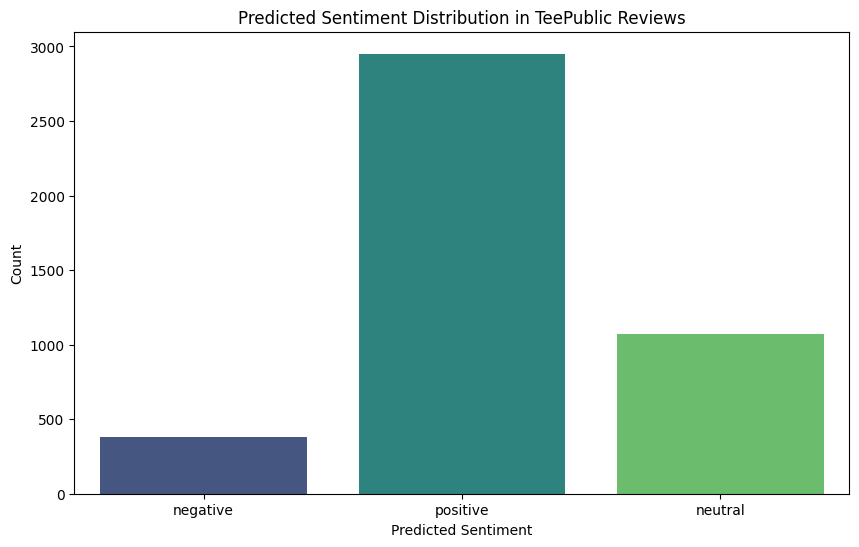

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='predicted_sentiment', data=df, palette='viridis')
plt.title('Predicted Sentiment Distribution in TeePublic Reviews')
plt.xlabel('Predicted Sentiment')
plt.ylabel('Count')
plt.show()

### Step 15: Fine-tune the SVM model with different hyperparameters

In [19]:
c = 0.0
num_iterations = 1

for _ in range(num_iterations):
    c += 0.2
    g = 0.1
    print(f'c in the model: {c}')
    
    for i in range(5):
        print(g)
        svc_model = SVC(C=c, kernel='linear', gamma=g).fit(xtrain, ytrain)
        print(f"The model Accuracy: {svc_model.score(xtest, ytest) * 100 :.2f}%\n",
              "score of test data", svc_model.score(message2, test_df['sentiment']))
        g = g * 10

c in the model: 0.2
0.1
The model Accuracy: 69.94%
 score of test data 0.702037351443124
1.0
The model Accuracy: 69.94%
 score of test data 0.702037351443124
10.0
The model Accuracy: 69.94%
 score of test data 0.702037351443124
100.0
The model Accuracy: 69.94%
 score of test data 0.702037351443124
1000.0
The model Accuracy: 69.94%
 score of test data 0.702037351443124


In [20]:
joblib.dump(svc_model, 'Models/svm_model2.pkl')

['Models/svm_model2.pkl']